> # TELCO CUSTOMER CHURN CRISP-DM FRAMEWORK

# BUSSINESS UNDERSTATING OF TELCO CUSTOMER CHURN

> **Telco customer churn data is a dataset that contains information about customers who have left a telecom company. The dataset includes information about the customers who left within the last month, and it provides details about the services they used, such as phone, multiple lines, and internet services**

> **The business understanding of telco customer churn data is to determine if a customer from a particular telecom industry will leave that telecom service or not. This is done by performing a complete exploratory data analysis (EDA) process to draw insights from data visualization and analysis so that we could get the factors which will affect the output i.e. churn of the customer**

> **Telecom companies around the world are implementing a comprehensive, analytics-based approach to base management to reduce their churn by as much as 15%. The companies that excel at reducing churn through analytics find that four best practices separate them from average performers: developing a comprehensive view of the customer and linking that view directly to results, using cutting-edge analytical techniques, developing predictive models, and using machine learning algorithms.**

> **In summary, telco customer churn data is an important dataset for telecom companies to analyze in order to reduce their churn rate. By using advanced analytics techniques and machine learning algorithms, telecom companies can develop predictive models that help them identify customers who are most likely to leave their service and take proactive measures to retain them.**

### Import Package

In [95]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
import category_encoders


from category_encoders import LeaveOneOutEncoder
from category_encoders import TargetEncoder
from category_encoders import BinaryEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, PowerTransformer, RobustScaler, MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn import set_config

# algorithms
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# matrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

# warning
import warnings
warnings.filterwarnings('ignore')

In [96]:
# loading DataSet
telco_df = pd.read_csv(r"C:\Users\kalag\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [97]:
telco_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [98]:
telco_df.shape

(7043, 21)

# DATA UNDERSTATING
* **Each row represents a customer, each column contains customer’s attributes described on the column Metadata.**
* `Customers who left within the last month` – **the column is called Churn**

* `Services that each customer has signed up for` – **phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies**

* `Customer account information` – **how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges**

* `Demographic info about customers` – **gender, age range, and if they have partners and dependents**

## Features
* `CustomerID` - **Unique value for each customer**

* `Churn` - **Whether the customer churned or not (Yes, No)**

#### Services Information
* `PhoneService` - **whether the customer has a phone service or not (Yes,No)**

* `MultipleLines` - **whether the customer has a multiple line or not (Yes, No, No phone service)**

* `InternetService` - **type of internet service the customer has (DSL, Fiber Optic, No)**

* `OnlineSecurity` - **whether the customer has a online security or not (Yes, No)**

* `OnlineBackup` - **whether the customer has a online backup or not (Yes, No)**

* `DeviceProtection` - **whether the customer has a device protection or not (Yes, No)**

* `TechSupport` - **whether the customer has a tech support or not (Yes,No)**

* `StreamingTV` - **whether the customer has a streaming TV (Yes,No)**

* `StreamingMovies` - **whether the customer has a streaming movies (Yes,No)**


#### Account Information
* `Contract` - **type of contract customer has (Month-to-Month, One Year, Two Year)**

* `PaperlessBilling` - **whether the customer has a paperless billing (Yes,No)**

* `PaymentMethod` - **payment method use by customer (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))**


#### Demographic Information
* `gender` - **type of gender customer has (Male,Female)**

* `SeniorCitizen` - **whether the customer is a senior citizen (Yes,No)**

* `Partner` - **whether the customer has a partner or not (Yes, No)**

* `Dependents` - **whether the customer has a dependents or not (Yes,No)**

#### Numerical Information
* `MonthlyCharges` - **amount charged to the customer monthly**

* `TotalCharges` - **the total amount charge to the customer**

* `Tenure` - **how long customer has stayed in company**

## DATA PREPARATION (EDA)

> ## Data Preprocessing
* **Data cleaning**
* **Identifying and removing outliers**

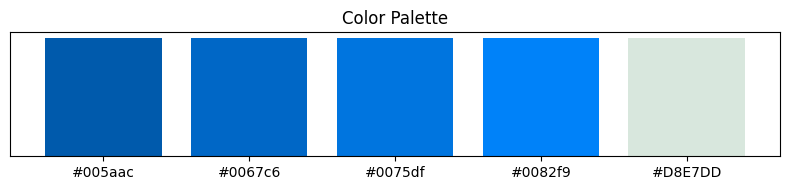

In [99]:
color_palette = ['#005aac', '#0067c6', '#0075df', '#0082f9','#D8E7DD']

# Create a bar plot to display the colors
plt.figure(figsize=(8, 2))
for i, color in enumerate(color_palette):
    plt.bar(i, height=1, color=color)

plt.xticks(range(len(color_palette)), color_palette, rotation=45)
plt.yticks([]) 
plt.title("Color Palette")
plt.xticks(rotation=360)

plt.tight_layout()
plt.show()


In [100]:
# removing duplicates
telco_df = telco_df.drop_duplicates()

In [101]:
telco_df.shape

(7043, 21)

In [102]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<Axes: >

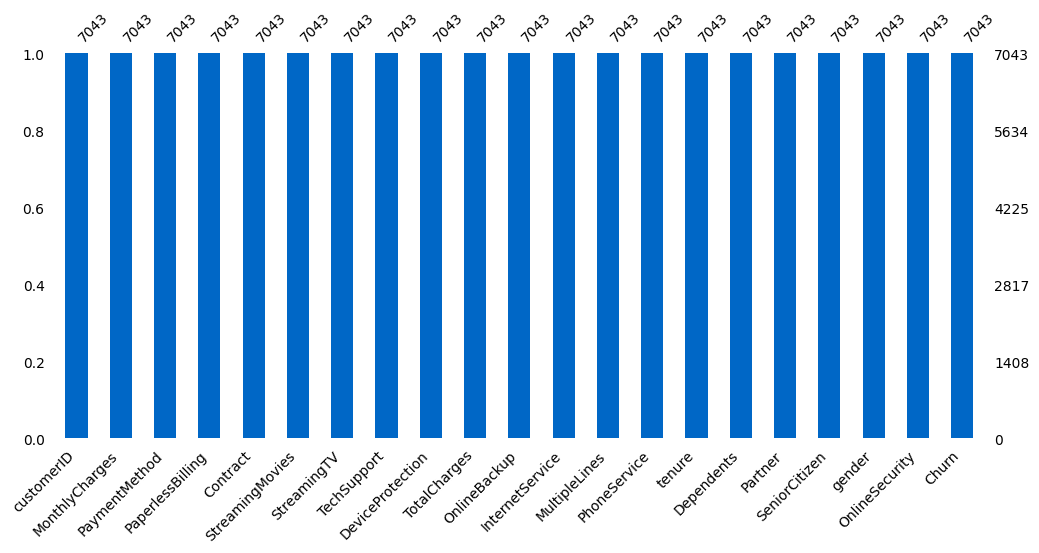

In [103]:
msno.bar(telco_df, color="#0067c6", sort="ascending", figsize=(12,5), fontsize=10)

* **Above Missingno Bar chat will says that the data doesn't any missing values**

In [104]:
# msno.matrix(telco_df, figsize=(15,5), fontsize=8,color=(0.27, 0.52, 1.0))

### From the above info and plot we can say that there are no missing values are available

In [105]:
# df.head()

In [106]:
# Check descriptive statistics

telco_df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


* **From above descriptive stats we can say that SeniorCitizen is to be a categorical data because of 25-50-75 is 0.00% and min value is 0 and max should be 1**
* `Tenure - how long customer has stayed in company`

    * **The average customer has stayed in company 32 months and 75% has a tenure unless 55 months**
* `MonthlyCharges - amount charged to the customer monthly`

    * **The average monthly charge USD is 64.76 and 75% customer paid USD 89.85**

In [107]:
telco_df['TotalCharges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 55.1+ KB


* **From above info the TotalCharge column must be a float not as data type object so we can change it into a float data type**

In [108]:
telco_df[(telco_df['customerID'] == '4472-LVYGI') | (telco_df['customerID'] == '3115-CZMZD')]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No


* **The above DataFrame will say's that some in consistence in data the TotalCharges columns wil have some spaces**
* **To avoid this will convert TotalChargers column object to the int column to replace this spaces by null values**

In [109]:
telco_df['TotalCharges'] = pd.to_numeric(telco_df['TotalCharges'], errors='coerce')

In [110]:
telco_df['TotalCharges'].isna().sum()

11

* **After removing the spaces into null values there are 11 missing values in TotalChargers**

In [111]:
# Check observation of missing values present in TotalCharges
telco_df[telco_df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


* **The DataFrame of contain 11 null values in TotalCharges**
* `Tenure - how long customer has stayed in company`
    * **Because the Tenure is zero so  will delete a row of missing values**

<Axes: xlabel='TotalCharges', ylabel='Density'>

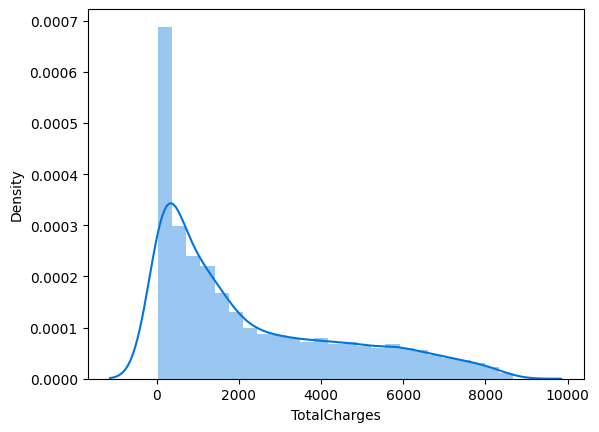

In [112]:
# Before Droping Missing Vales
sns.distplot(telco_df['TotalCharges'])

In [113]:
telco_df.dropna(inplace = True)

<Axes: xlabel='TotalCharges', ylabel='Density'>

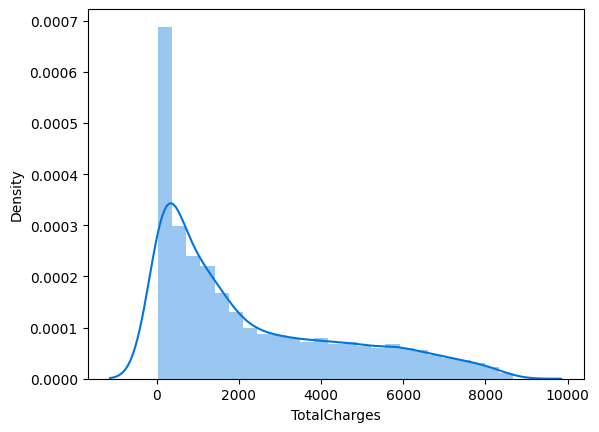

In [114]:
# After Droping missing
sns.distplot(telco_df['TotalCharges'])

In [115]:
telco_df.shape

(7032, 21)

In [116]:
telco_df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Target column visuvalization

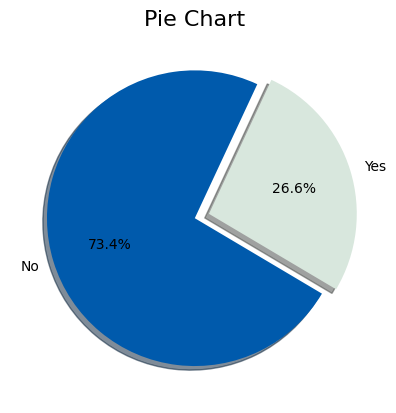

In [117]:
custom_palette = ["#005aac", "#D8E7DD"]

# Remove the whitegrid style by not setting any specific style
# sns.set(style="whitegrid")

# Rest of your code
churn_counts = telco_df['Churn'].value_counts()
plt.pie(churn_counts, labels=churn_counts.index,shadow=True, autopct='%1.1f%%',
        startangle=65, colors=custom_palette, explode=(0, 0.1))
plt.title("Pie Chart", fontsize=16)
plt.show()

### Target data class is show imbalance data between churners and not-churners
* `Churn - Whether the customer churned or not (Yes, No)`
    * **There are 74.4% are NO means not churn and reming 26.6% are YES means churn**

# Unique Values In Every Catagorical Columns

In [118]:
object_columns = telco_df.select_dtypes(include=['object']).drop('customerID',axis=1).columns

for col in object_columns:
    unique_values = telco_df[col].unique()
    print(f"Unique values in '{col}' =====> {unique_values}\n")

Unique values in 'gender' =====> ['Female' 'Male']

Unique values in 'Partner' =====> ['Yes' 'No']

Unique values in 'Dependents' =====> ['No' 'Yes']

Unique values in 'PhoneService' =====> ['No' 'Yes']

Unique values in 'MultipleLines' =====> ['No phone service' 'No' 'Yes']

Unique values in 'InternetService' =====> ['DSL' 'Fiber optic' 'No']

Unique values in 'OnlineSecurity' =====> ['No' 'Yes' 'No internet service']

Unique values in 'OnlineBackup' =====> ['Yes' 'No' 'No internet service']

Unique values in 'DeviceProtection' =====> ['No' 'Yes' 'No internet service']

Unique values in 'TechSupport' =====> ['No' 'Yes' 'No internet service']

Unique values in 'StreamingTV' =====> ['No' 'Yes' 'No internet service']

Unique values in 'StreamingMovies' =====> ['No' 'Yes' 'No internet service']

Unique values in 'Contract' =====> ['Month-to-month' 'One year' 'Two year']

Unique values in 'PaperlessBilling' =====> ['Yes' 'No']

Unique values in 'PaymentMethod' =====> ['Electronic check' 'M

In [119]:
# color_palette = ['#005aac' , '#0067c6' , '#0075df' , '#0082f9' , '#ac5200']

In [120]:
# Delete "automatic" from PaymentMethod
telco_df["PaymentMethod"] = telco_df["PaymentMethod"].str.replace(" (automatic)", "", regex=False)
telco_df["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

### Analysis Service Each Customer According To Target (Churn And No Churn)

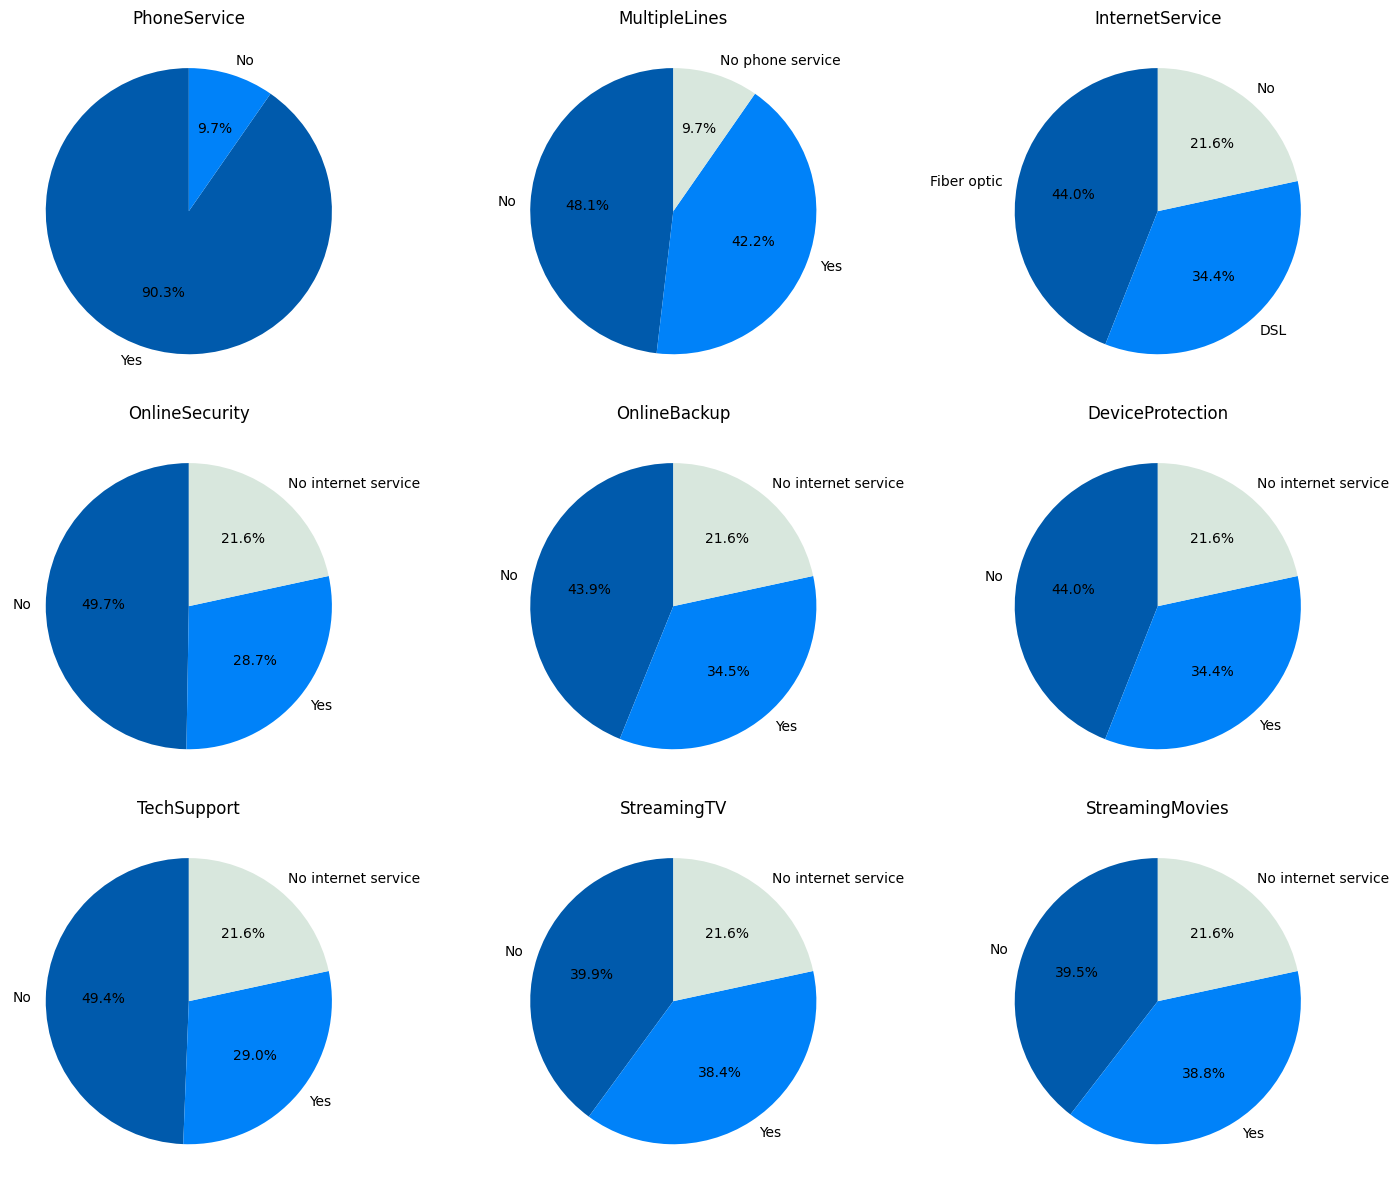

In [168]:
services = ["PhoneService", "MultipleLines", "InternetService", 
            "OnlineSecurity", "OnlineBackup", "DeviceProtection", 
            "TechSupport", "StreamingTV", "StreamingMovies"]
service_counts = [telco_df[service].value_counts() for service in services]

# Define the custom colors
custom_colors = ["#005aac", "#0082f9", "#D8E7DD"]

# Create a subplot grid for pie charts
fig, axes = plt.subplots(3, 3, figsize=(15,12))

# Iterate through the services and create a pie chart for each
for i, (service, counts) in enumerate(zip(services, service_counts)):
    ax = axes[i // 3, i % 3]  # Get the current subplot
    ax.pie(counts, labels=counts.index, colors=custom_colors, autopct='%1.1f%%', startangle=90)
    ax.set_title(service)
    
# Adjust layout and display the pie charts
plt.tight_layout()
plt.show()


* **The above pie chat represent that there large amount of phone services are available**
* **But internet service are of all the services is 21.6%**
* **The above pie chat we can see that there are most of the services are NO  is more when compare to the YES and No Internet Service**

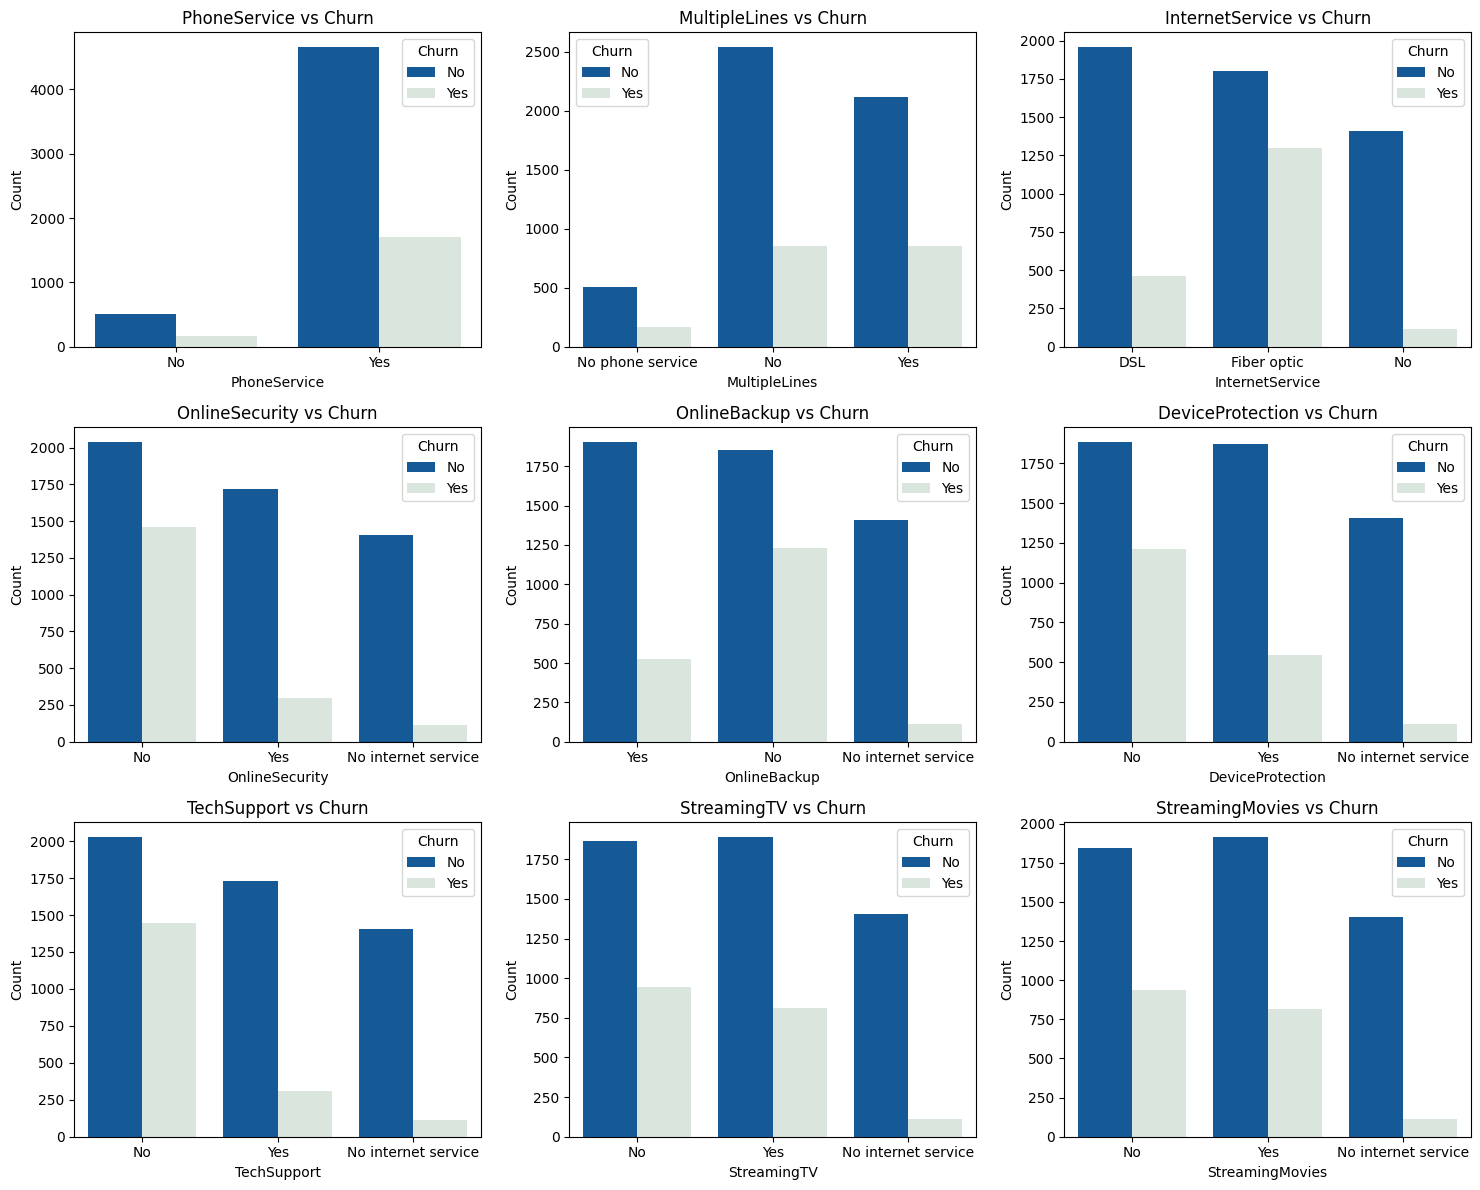

In [122]:
services = ["PhoneService", "MultipleLines", "InternetService", 
            "OnlineSecurity", "OnlineBackup", "DeviceProtection", 
            "TechSupport", "StreamingTV", "StreamingMovies"]

# Define the custom color palette
custom_colors = ["#005aac", "#0082f9", "#D8E7DD"]

plt.figure(figsize=(15, 12))

for i, service in enumerate(services, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=telco_df, x=service, hue="Churn", palette=custom_palette)
    plt.title(f"{service} vs Churn")
    plt.xlabel(service)
    plt.ylabel("Count")
    plt.legend(title="Churn", labels=["No", "Yes"])

plt.tight_layout()
plt.show()


* **The moderately higher churn rate for customers who has the phone service.**
* **Customers with internet service fiber optic have a higher churn rate compared with DSL and No.**
* **The much higher churn rate for customers without online security.**
* **Customers who don't have access to tech support tend to have a higher churn rate.**
* **Customers without online backup and device protection have a higher churn rate.**

### Analysis Customer Account Information

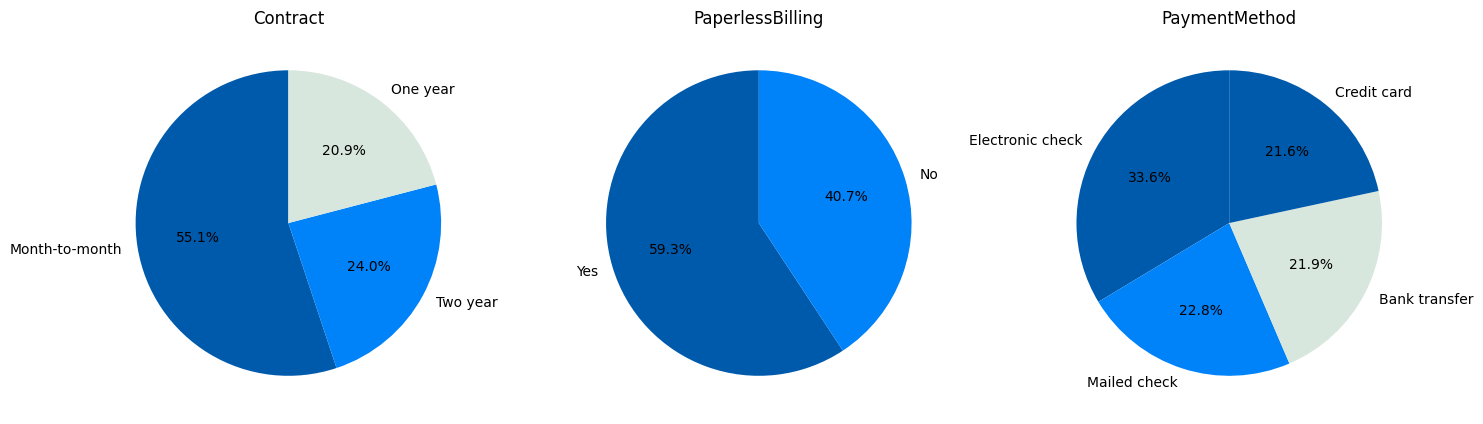

In [123]:
import matplotlib.pyplot as plt

# Data for the pie charts
account_info_counts = [telco_df[service].value_counts() for service in account_info]

# Define the custom colors
custom_colors = ["#005aac", "#0082f9", "#D8E7DD"]

# Create a subplot grid for pie charts with one row and three columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Iterate through the account_info variables and create a pie chart for each
for i, (service, counts) in enumerate(zip(account_info, account_info_counts)):
    ax = axes[i]  # Get the current subplot
    ax.pie(counts, labels=counts.index, colors=custom_colors, autopct='%1.1f%%', startangle=90)
    ax.set_title(service)
    
# Adjust layout and display the pie charts
plt.tight_layout()
plt.show()


* **`Contract` The most of the Customers are in month-to-month contract when compare to yearly contract**

* **`PaperlessBilling` The most of the Customers are in PaperlessBilling are YES**

* **`PaymentMethod` The most of the Customers are using  Electonic check and remaing are in Mailed Check, Bank Transfer and Credit Card**

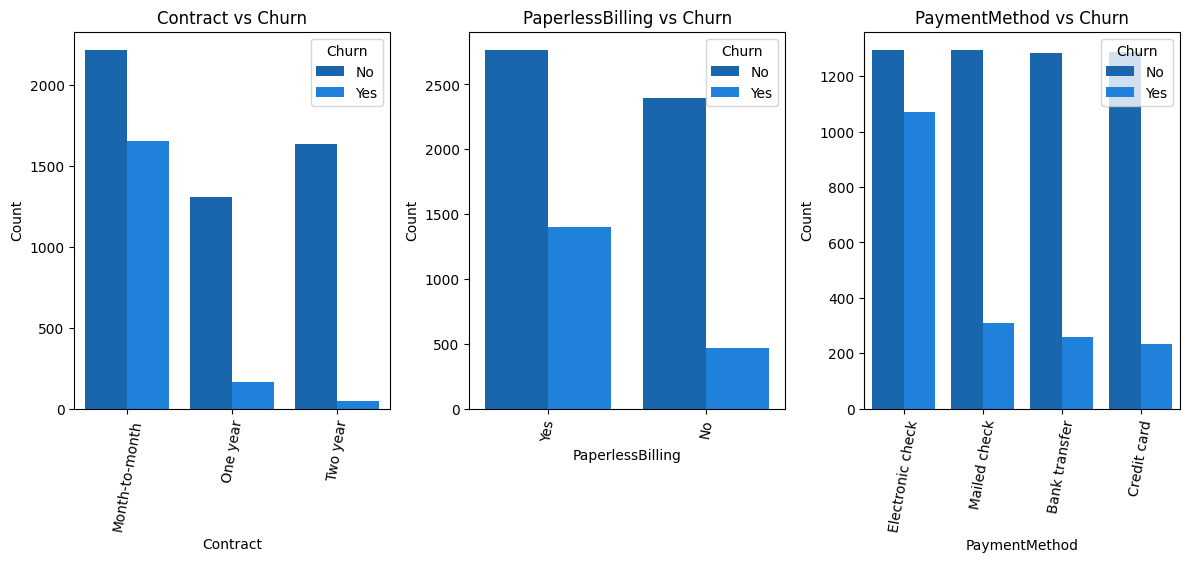

In [171]:
account_info = ["Contract","PaperlessBilling","PaymentMethod"]
custom_palette = ["#0067c6","#0082f9"]

plt.figure(figsize=(12, 15))
for i, service in enumerate(account_info, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=telco_df, x=service, hue="Churn", palette=custom_palette)
    plt.title(f"{service} vs Churn")
    plt.xlabel(service)
    plt.ylabel("Count")
    plt.legend(title="Churn", labels=["No", "Yes"])
    plt.xticks(rotation=80)
plt.tight_layout()
plt.show()

* **`contract`  Customers with month-to-month contracts have higher churn rates compared to clients with yearly contracts**

* **`PaperlessBilling`  customers who receive paper bill have higher churn rate compared to customers with no receive paper bill**

* **`PaymentMethod`  Customers with payment method using electronic check have higher churn rates compared to mailed check, bank transfer, and credit card**

### Analysis Customer Demographic Info

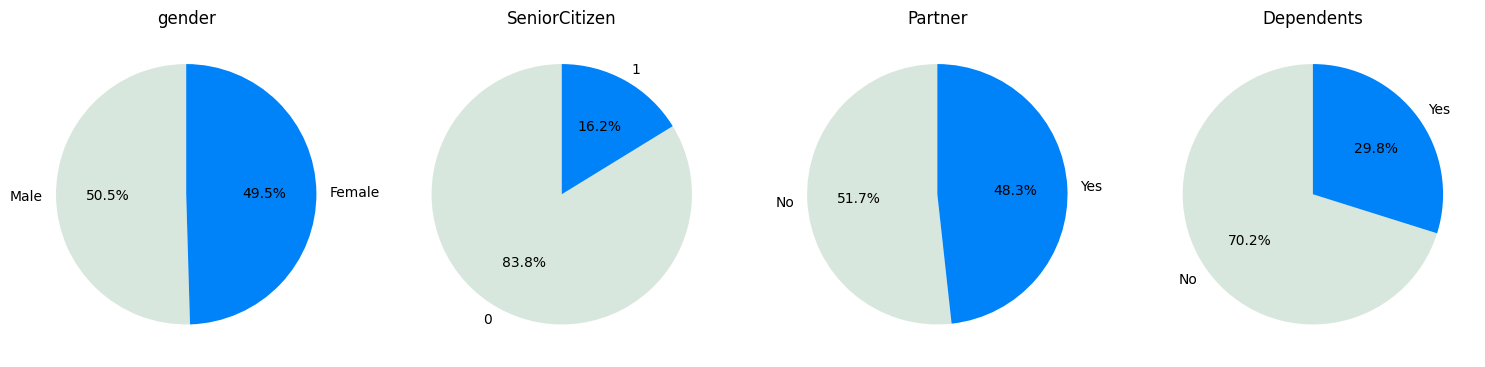

In [125]:
Demographic_info = ["gender","SeniorCitizen","Partner","Dependents"]

demographic_info_counts = [telco_df[service].value_counts() for service in Demographic_info]

# Define the custom colors
custom_colors = ["#D8E7DD", "#0082f9"]

# Create a subplot grid for pie charts with one row and four columns
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# Iterate through the Demographic_info variables and create a pie chart for each
for i, (service, counts) in enumerate(zip(Demographic_info, demographic_info_counts)):
    ax = axes[i]  # Get the current subplot
    ax.pie(counts, labels=counts.index, colors=custom_colors, autopct='%1.1f%%', startangle=90)
    ax.set_title(f"{service}")
    
# Adjust layout and display the pie charts
plt.tight_layout()
plt.show()


* **`Gender` There are no lot differnce between Male and Female there are almost equal**

* **`Senior Citizen` Most of them are not a Senior Citizen young customers are more**

* **`Partner` Customer who have partner and no have almost equal a little bit no partner is more**

* **`Depandents` The most of the Customers are not Dependents**

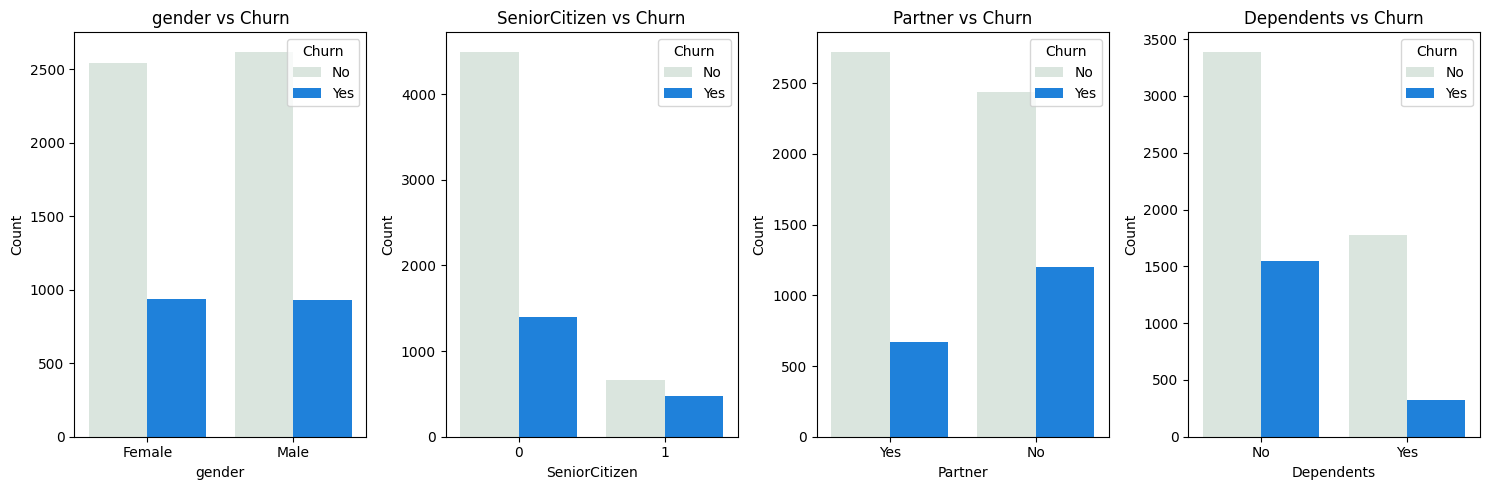

In [126]:
Demographic_info = ["gender","SeniorCitizen","Partner","Dependents"]
plt.figure(figsize=(15, 5))
custom_palette = ["#D8E7DD","#0082f9"]
for i, service in enumerate(Demographic_info, 1):
    plt.subplot(1, 4, i)
    sns.countplot(data=telco_df, x=service, hue="Churn", palette=custom_palette)
    plt.title(f"{service} vs Churn")
    plt.xlabel(service)
    plt.ylabel("Count")
    plt.legend(title="Churn", labels=["No", "Yes"])
#     plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* **`gender` gender has no significance difference who churned and not churned**

* **`SeniorCitizen` Young customers have higher churn rates compared with senior customer**

* **`Partner` Customer who haven't partner more than chunr compared with have partner**

* **`Dependents` Customer with no have dependents more highly churn rates compared with yes dependents**

### Check Outliers Of Numerical Columns Using Boxplot

<Figure size 1000x600 with 0 Axes>

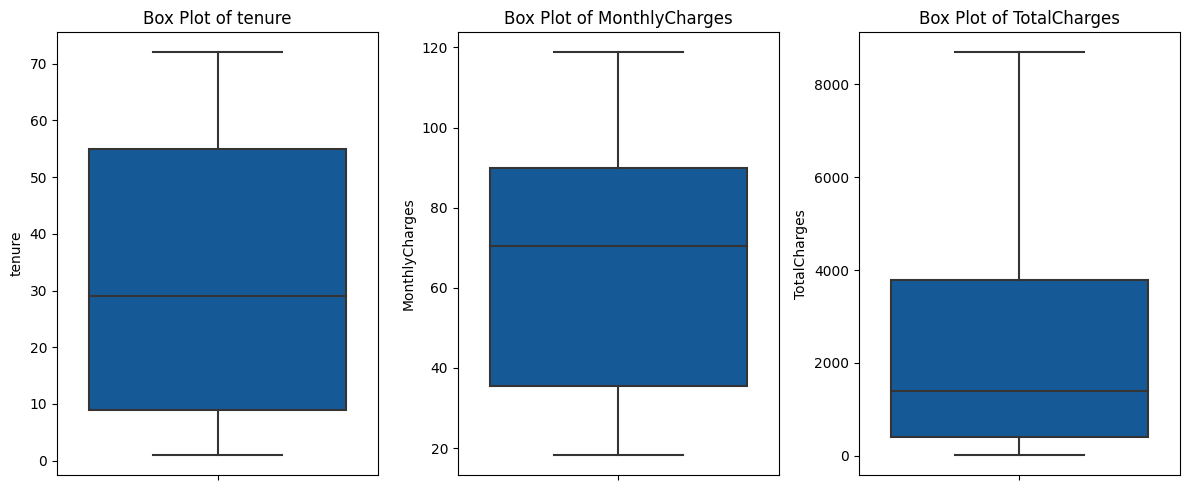

In [127]:
numerical_col = ["tenure","MonthlyCharges","TotalCharges"]
plt.figure(figsize=(10, 6))
custom_palette = ['#005aac','#0082f9']
# Create box plots for each numerical column
plt.figure(figsize=(12, 5))  # Adjust figure size for vertical plots

# Create vertically oriented box plots for each numerical column
for i, value in enumerate(numerical_col, 1):
    plt.subplot(1, 3, i)  # Create a 3x1 grid of subplots
    sns.boxplot(data=telco_df, y=value, palette=custom_palette)
    plt.title(f"Box Plot of {value}")
    plt.ylabel(value)

plt.tight_layout()
plt.show()

* **The above Box plot shows that there are no outlies of Three Numerical Columns**

### KDE - Plot For Numerical Columns With Target Column Churn

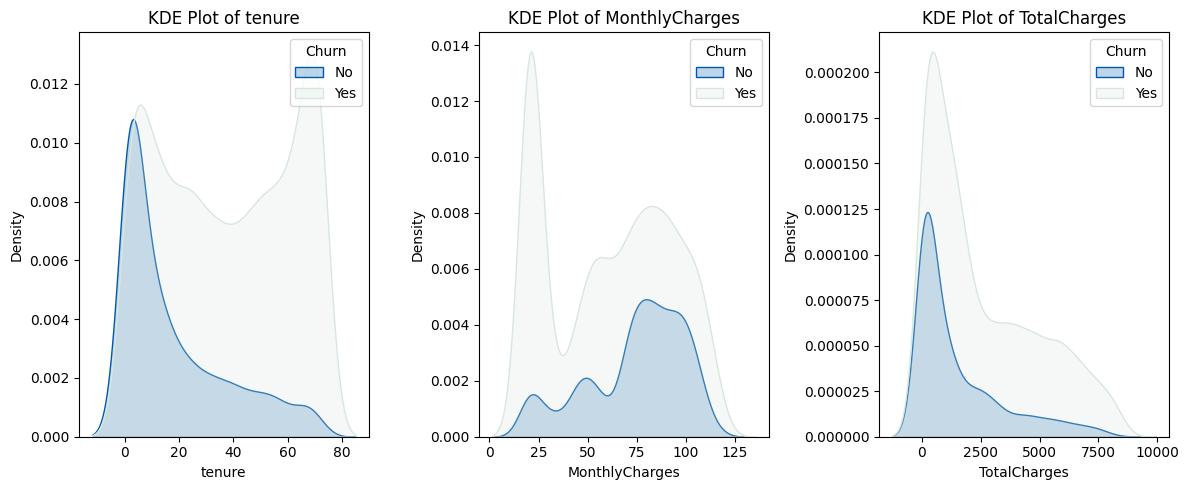

In [128]:
numerical_col = ["tenure", "MonthlyCharges", "TotalCharges"]

plt.figure(figsize=(12, 5))
custom_palette = ["#D8E7DD","#005aac"]
# Create KDE plots with shaded areas and hue for churned and non-churned customers
for i, value in enumerate(numerical_col, 1):
    plt.subplot(1, 3, i)
    sns.kdeplot(data=telco_df, x=value, palette=custom_palette,hue="Churn", shade=True)
    plt.title(f"KDE Plot of {value}")
    plt.xlabel(value)
    plt.ylabel("Density")
    plt.legend(title="Churn", labels=["No", "Yes"])

plt.tight_layout()
plt.show()


* **`Tenure` customer who has low tenure and high tenure tends to churn**

* **`MonthlyCharges` high churn rate when customer paid high monthly charges**

* **`TotalCharges` customer with total charges high tends to leave a company**

### Correlation Heatmap of Numerical Columns

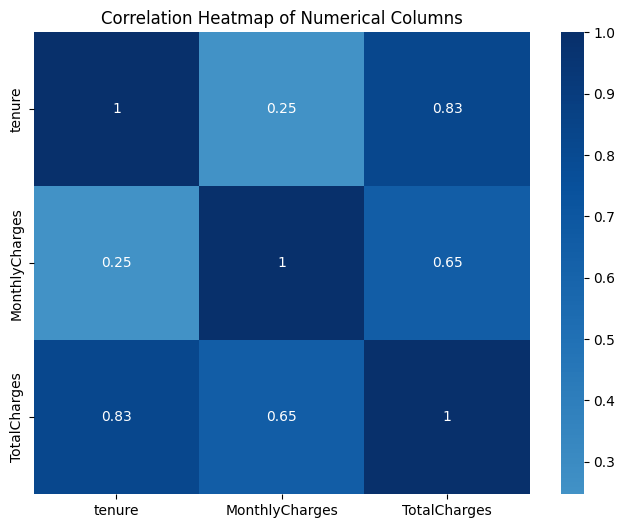

In [129]:

numerical_columns = ["tenure", "MonthlyCharges", "TotalCharges"]

correlation_matrix = telco_df[numerical_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", center=0)
plt.title("Correlation Heatmap of Numerical Columns")
plt.show()


* **Here is the Relation ship between two Numerical columns**
* **The TotalCharges and Tenure have Strong Positive Relation**
* **The TotalCharges and MonthlyCharges are also a positive Relation**
* **There are no negative Relation Betweeen them**

### Pair Plot of Numerical Columns

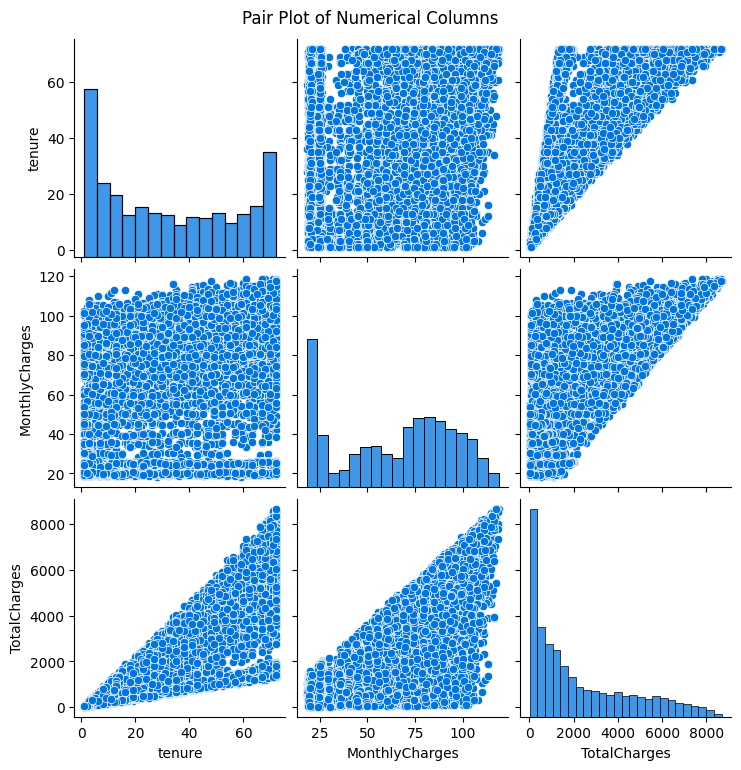

In [130]:
sns.set_palette(['#0075df'])
sns.pairplot(telco_df[numerical_col])
plt.suptitle("Pair Plot of Numerical Columns", y=1.02)
plt.show()

* **The Above pair plot we see the relationship between two numerical columns with Scatterplot**

### Data preprocessing
* **Converting Catagorical Columns Into Numerical By OnehotEncoding**
* **Converting Numerical Columns All Into A One Scale By Using MinMax, Standadization, RobustScale**

In [131]:
pd.set_option('display.max_columns',21)

In [132]:
telco_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer,42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [133]:
#

## Spliting The Data Into Train And Test

In [134]:
telco_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [135]:
X_train, X_test, Y_train, Y_test = train_test_split(telco_df.drop(columns = ['customerID','Churn']),
                                                    telco_df['Churn'],
                                                    test_size=0.25,
                                                    random_state=100)

In [136]:
print(f'X_train_shape : {X_train.shape}\n'
      f'X_test_shape  : {X_test.shape}\n'
      f'Y_train_len   : {Y_train.shape}\n'
      f'Y_test_len    : {Y_test.shape}')

X_train_shape : (5274, 19)
X_test_shape  : (1758, 19)
Y_train_len   : (5274,)
Y_test_len    : (1758,)


In [137]:
catagirical_col = list(X_train.select_dtypes(include=['object']))
numerical_col = list(X_train.select_dtypes(exclude=['object']).columns.drop(['SeniorCitizen']))

In [138]:
# labelEncoding for target column
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_test = le.fit_transform(Y_test)

### Creating A Pipeline Of Categorical Columns

In [139]:
catgorical_pipl_oe = Pipeline(steps = [
    
    ('oneHotEndoding' , OneHotEncoder(sparse_output = False , drop = 'first'))
])

In [140]:
catgorical_pipl_be = Pipeline(steps = [
    
    ('BinaryEncoder' , BinaryEncoder())
])

In [141]:
catgorical_pipl_te = Pipeline(steps = [
    
    ('TargetEncoder' , TargetEncoder())
])

In [142]:
catgorical_pipl_tle = Pipeline(steps = [
    
    ('LeaveOneOutEncoder' , LeaveOneOutEncoder())
])

### Creating A Pipeline Of Numerical Columns

In [143]:
# minMaxScaler
numerical_pipl_mm = Pipeline(steps = [
    
    ('MinMaxScaler'     , MinMaxScaler()),
    ('PowerTransformer' , PowerTransformer())
    
])

In [144]:
# robustScaler
numerical_pipl_rs = Pipeline(steps = [
    
    ('RobustScaler'     , RobustScaler()),
    ('PowerTransformer' , PowerTransformer())
    
])

In [145]:
# standardScaler
numerical_pipl_ss = Pipeline(steps = [
    
    ('StandardScaler'   , StandardScaler()),
    ('PowerTransformer' , PowerTransformer())
    
])

## Column Transformer To Combine All The Pipeline To One Final Pipeline

### OneHotEncoder With Minmaxscaler, RobustScaler, Standardscaler

In [146]:
ohe_minmax = ColumnTransformer(transformers = [
    
    ('OneHotEncoder' , catgorical_pipl_oe   , catagirical_col),
    ('MinMaxScaler'  , numerical_pipl_mm    , numerical_col),
    
    
],remainder = 'passthrough')

In [147]:
ohe_robst = ColumnTransformer(transformers = [
    
    ('OneHotEncoder' , catgorical_pipl_oe   , catagirical_col),
    ('RobustScaler'  , numerical_pipl_rs    , numerical_col),
    
    
],remainder = 'passthrough')

In [148]:
ohe_stnd = ColumnTransformer(transformers = [
    
    ('OneHotEncoder' , catgorical_pipl_oe   , catagirical_col),
    ('StandardScalar'  , numerical_pipl_ss    , numerical_col),
    
    
],remainder = 'passthrough')

### Binary Encoder With Minmaxscaler, RobustScaler, Standardscaler

In [149]:
bi_minmax = ColumnTransformer(transformers = [
    
    ('BinaryEncoder' , catgorical_pipl_be   , catagirical_col),
    ('MinMaxScaler'  , numerical_pipl_mm    , numerical_col),
    
    
],remainder = 'passthrough')

In [150]:
bi_robst = ColumnTransformer(transformers = [
    
    ('BinaryEncoder' , catgorical_pipl_be   , catagirical_col),
    ('RobustScaler'  , numerical_pipl_rs    , numerical_col),
    
    
],remainder = 'passthrough')

In [151]:
bi_stnd = ColumnTransformer(transformers = [
    
    ('BinaryEncoder' , catgorical_pipl_be   , catagirical_col),
    ('StandardScaler'  , numerical_pipl_ss    , numerical_col),
    
    
],remainder = 'passthrough')

### Target Encoder With Minmaxscaler, RobustScaler, Standardscaler

In [152]:
te_minmax = ColumnTransformer(transformers = [
    
    ('TargerEncoder' , catgorical_pipl_te   , catagirical_col),
    ('MinMaxScaler'  , numerical_pipl_mm    , numerical_col),
    
    
],remainder = 'passthrough')

In [153]:
te_robst = ColumnTransformer(transformers = [
    
    ('TargerEncoder' , catgorical_pipl_te   , catagirical_col),
    ('RobustScaler'  , numerical_pipl_rs    , numerical_col),
    
    
],remainder = 'passthrough')

In [154]:
te_stnd = ColumnTransformer(transformers = [
    
    ('TargerEncoder' , catgorical_pipl_te   , catagirical_col),
    ('StandardScaler'  , numerical_pipl_ss    , numerical_col),
    
    
],remainder = 'passthrough')

### LeaveOneOut Encoder With Minmaxscaler, RobustScaler, Standardscaler

In [155]:
loe_minmax = ColumnTransformer(transformers = [
    
    ('LeaveOneOutEncoder' , catgorical_pipl_tle   , catagirical_col),
    ('MinMaxScaler'  , numerical_pipl_mm    , numerical_col),
    
    
],remainder = 'passthrough')

In [156]:
loe_robst = ColumnTransformer(transformers = [
    
    ('LeaveOneOutEncoder' , catgorical_pipl_tle   , catagirical_col),
    ('RobustScaler'  , numerical_pipl_rs    , numerical_col),
    
    
],remainder = 'passthrough')

In [157]:
loe_stnd = ColumnTransformer(transformers = [
    
    ('LeaveOneOutEncoder' , catgorical_pipl_tle   , catagirical_col),
    ('StandardScaler'  , numerical_pipl_ss    , numerical_col),
    
    
],remainder = 'passthrough')

# MODELLING 

#### **`The below code will select a Random Preprocessing Technics of all possiblity has we already Created a Pipeline above`**

select_preprocessing_step : ohe_minmax
Model: Decision Tree
Accuracy: 0.72469
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1268
           1       0.51      0.52      0.51       490

    accuracy                           0.72      1758
   macro avg       0.66      0.66      0.66      1758
weighted avg       0.73      0.72      0.73      1758

**********************************************************************
Model: Random Forest
Accuracy: 0.77873
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85      1268
           1       0.63      0.51      0.56       490

    accuracy                           0.78      1758
   macro avg       0.73      0.70      0.71      1758
weighted avg       0.77      0.78      0.77      1758

**********************************************************************
Model: Gradient Boosting
Accuracy: 0.80

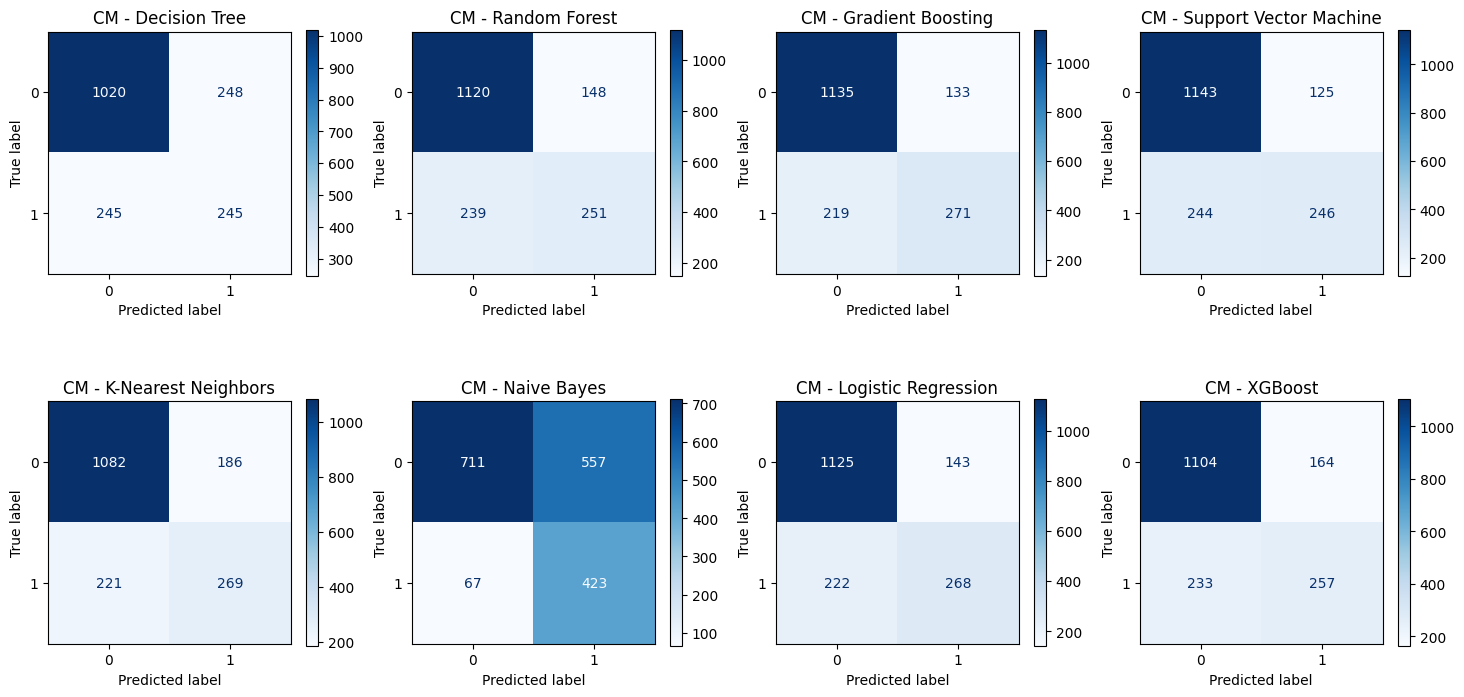

In [158]:
select_preprocessing_step = np.random.choice(['ohe_minmax', 'ohe_robst', 'ohe_stnd', 
                                              'bi_minmax', 'bi_robst','bi_stnd',
                                              'te_minmax','te_robst','te_stnd',
                                              'loe_minmax','loe_robst'])


#                  creating a pipeline
#***************************************************************#

#                 KNeighbors Classifier
#================================================================#
final_pipeline_knc = Pipeline(steps = [
    
    ('pre_col_Transformer' , eval(select_preprocessing_step)),
    ('KNeighborsClassifier',KNeighborsClassifier())
])


#                  Logistic Regression
#================================================================#
final_pipeline_lr = Pipeline(steps = [
    
    ('pre_col_Transformer' , eval(select_preprocessing_step)),
    ('LogisticRegression',LogisticRegression())
])


#                 Support Vector Classifier
#================================================================#
final_pipeline_svc = Pipeline(steps = [
    
    ('pre_col_Transformer' , eval(select_preprocessing_step)),
    ('suppportVector',SVC())
])

#               Decision Tree Classifier
#================================================================#
final_pipeline_dt = Pipeline(steps = [
    
    ('pre_col_Transformer' , eval(select_preprocessing_step)),
    ('DecisionTreeClassifier',DecisionTreeClassifier())
])


#               Random Forest Classifier
#================================================================#
final_pipeline_rf = Pipeline(steps = [
    
    ('pre_col_Transformer' , eval(select_preprocessing_step)),
    ('RandomForestClassifier',RandomForestClassifier())
])


#               Gradient Boosting Classifier
#================================================================#
final_pipeline_gbc = Pipeline(steps = [
    
    ('pre_col_Transformer' , eval(select_preprocessing_step)),
    ('GradientBoostingClassifier',GradientBoostingClassifier())
])


#                         GaussianNB
#================================================================#
final_pipeline_gnb = Pipeline(steps = [
    
    ('pre_col_Transformer' , eval(select_preprocessing_step)),
    ('GaussianNB',GaussianNB())
])


#                        XGB Classifier
#================================================================#
final_pipeline_xgb = Pipeline(steps = [
    
    ('pre_col_Transformer' , eval(select_preprocessing_step)),
    ('XGBClassifier',XGBClassifier())
])


# modelling
models = {
    'Decision Tree': final_pipeline_dt,
    'Random Forest': final_pipeline_rf,
    'Gradient Boosting': final_pipeline_gbc,
    'Support Vector Machine': final_pipeline_svc,
    'K-Nearest Neighbors': final_pipeline_knc,
    'Naive Bayes': final_pipeline_gnb,
    'Logistic Regression': final_pipeline_lr,
    'XGBoost': final_pipeline_xgb
}

print(f'select_preprocessing_step : {select_preprocessing_step}')
print('='*70)

for model_name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(Y_test, y_pred)
#     precision = precision_score(Y_test, y_pred, average='weighted')
#     recall = recall_score(Y_test, y_pred, average='weighted')
#     f1 = f1_score(Y_test, y_pred, average='weighted')
    
    report = classification_report(Y_test, y_pred)
    
    print(f'Model: {model_name}')
    print(f'Accuracy: {accuracy:.5f}')
    print('Classification Report:\n', report)
    print('*' * 70)

    
    
# Plot the confusion matrix
print('Plotting a Confusion Matrix')
print('*'*125)
fig, axes = plt.subplots(2, 4, figsize=(18, 8))
fig.subplots_adjust(hspace=0.5)

for (model_name, model), ax in zip(models.items(), axes.flatten()):
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(Y_test, y_pred, labels=np.unique(Y_test))
    
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(Y_test))
    
    cm_display.plot(cmap=plt.cm.Blues, ax=ax)
    ax.set_title(f'CM - {model_name}')

plt.show()